# Generating dataset 


In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt

import torch
import torchvision.transforms as T
from torchvision import datasets
import copy
import os
from tqdm.notebook import tqdm
import numpy as np 
np.set_printoptions(suppress=True)

import random

# With image background
download dataset from here: https://sites.google.com/a/lisa.iro.umontreal.ca/public_static_twiki/variations-on-the-mnist-digits


In [93]:
# get original dataset
path_data = '../data/MNIST_bgimage/'
dataset_type = 'test'

def get_tensorized_dataset(im_set):
    images = []
    labels = []
    for img, label in im_set:
        img = np.array(img)
        images.append(img)    
        labels.append(label)
        
    # convert to tensor and one-hot vector
    transform_tohot = T.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
    images_tensorized = torch.stack([T.ToTensor()(im) for im in images])
    labels_tensorized = torch.stack([transform_tohot(label) for label in labels])
    
    return images_tensorized, labels_tensorized

if dataset_type == 'train':
    im_set = datasets.MNIST('../data/',train=True, download=False)
elif dataset_type == 'test':
    im_set = datasets.MNIST('../data/',train=False, download=False)

orig_images_tensorized, orig_labels_tensorized = get_tensorized_dataset(im_set)
print(orig_images_tensorized.size())
print(orig_labels_tensorized.size())

torch.Size([10000, 1, 28, 28])
torch.Size([10000, 10])


In [94]:
def get_tensorized_dataset(im_set):
    
    images = []
    labels = []
    for img, label in im_set:
        img = np.array(img)
        img = img.reshape([28,28]).T
        images.append(img)
        labels.append(int(label[0]))
        
    # convert to tensor and one-hot vector
    transform_tohot = T.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
    images_tensorized = torch.stack([T.ToTensor()(im) for im in images])
    labels_tensorized = torch.stack([transform_tohot(label) for label in labels])
    
    return images_tensorized, labels_tensorized

def plot(imgs, num_rows = 1, with_orig=False, row_title=None, **imshow_kwargs):
#     if not isinstance(imgs, list):
#         raise ValueError('input images should be list form')

    num_cols = int(len(imgs)/num_rows) + (len(imgs)%num_rows > 0)
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
#     import pdb; pdb.set_trace()
    for row_idx in range(num_rows):
        for col_idx, img in enumerate(imgs[row_idx*num_cols:(row_idx+1)*num_cols]):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), cmap='gray', vmin=0, vmax=1,  **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

#     if with_orig:
#         axs[0, 0].set(title='Original image')
#         axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])
    plt.show()
#     plt.tight_layout()


# load data and tensorize


data = np.loadtxt(path_data+f'mnist_background_images_{dataset_type}.amat')
add_im_set = zip(data[:, :-1], data[:, -1:])

add_images_tensorized, add_labels_tensorized = get_tensorized_dataset(add_im_set)
add_images_tensorized = add_images_tensorized.type(torch.float32)
add_labels_tensorized = add_labels_tensorized.type(torch.float32)

print(add_images_tensorized.size())
print(add_labels_tensorized.size())

# torch.Size([12000, 1, 28, 28])
# torch.Size([12000, 10])

torch.Size([50000, 1, 28, 28])
torch.Size([50000, 10])


In [95]:
# concat
concat_images = torch.cat([orig_images_tensorized, add_images_tensorized], dim=0)
concat_labels = torch.cat([orig_labels_tensorized, add_labels_tensorized], dim=0)

# shuffle
shuffled_ids= torch.randperm(concat_images.shape[0])
concat_images = concat_images[shuffled_ids]
concat_labels = concat_labels[shuffled_ids]

print(concat_images.size())
print(concat_labels.size())

torch.Size([60000, 1, 28, 28])
torch.Size([60000, 10])


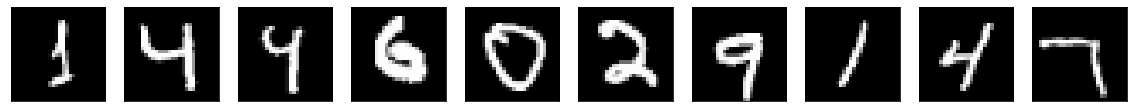

[tensor(1), tensor(4), tensor(4), tensor(6), tensor(0), tensor(2), tensor(9), tensor(1), tensor(4), tensor(7)]


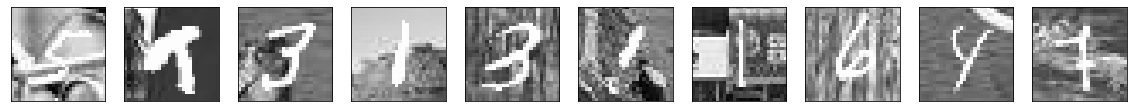

[tensor(5), tensor(9), tensor(3), tensor(1), tensor(3), tensor(1), tensor(1), tensor(6), tensor(4), tensor(7)]


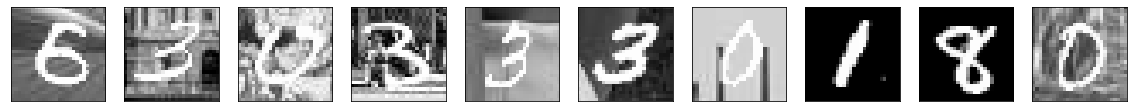

[tensor(6), tensor(3), tensor(0), tensor(3), tensor(3), tensor(3), tensor(0), tensor(1), tensor(8), tensor(0)]


In [96]:
# visualize
plt.rcParams["figure.figsize"] = (20,3)
i =90#152
plottedimgs = [torch.movedim(orig_images_tensorized[i], 0 ,-1) for i in range(10*i,10*(i+1))]
plot(plottedimgs, num_rows=1)
print([l.argmax() for l in orig_labels_tensorized[10*i:10*(i+1)]])

plottedimgs = [torch.movedim(add_images_tensorized[i], 0 ,-1) for i in range(10*i,10*(i+1))]
plot(plottedimgs, num_rows=1)
print([l.argmax() for l in add_labels_tensorized[10*i:10*(i+1)]])

plottedimgs = [torch.movedim(concat_images[i], 0 ,-1) for i in range(10*i,10*(i+1))]
plot(plottedimgs, num_rows=1)
print([l.argmax() for l in concat_labels[10*i:10*(i+1)]])

In [74]:
# save additional tensors 
filename = os.path.join(path_data, f'{dataset_type}_bgimage.pt')
torch.save((add_images_tensorized, add_labels_tensorized), filename)
print(f'{filename} saved to disk')

../data/MNIST_bgimage/train_bgimage.pt saved to disk


In [97]:
## add to original + additional concat dataset
filename = os.path.join(path_data, f'{dataset_type}_original_and_bgimage.pt')
torch.save((concat_images, concat_labels), filename)
print(f'{filename} saved to disk')

../data/MNIST_bgimage/test_original_and_bgimage.pt saved to disk


# With random background
download dataset from here: https://sites.google.com/a/lisa.iro.umontreal.ca/public_static_twiki/variations-on-the-mnist-digits


In [103]:
# get original dataset
path_data = '../data/MNIST_bgrandom/'
dataset_type = 'test'

def get_tensorized_dataset(im_set):
    images = []
    labels = []
    for img, label in im_set:
        img = np.array(img)
        images.append(img)    
        labels.append(label)
        
    # convert to tensor and one-hot vector
    transform_tohot = T.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
    images_tensorized = torch.stack([T.ToTensor()(im) for im in images])
    labels_tensorized = torch.stack([transform_tohot(label) for label in labels])
    
    return images_tensorized, labels_tensorized

if dataset_type == 'train':
    im_set = datasets.MNIST('../data/',train=True, download=False)
elif dataset_type == 'test':
    im_set = datasets.MNIST('../data/',train=False, download=False)

orig_images_tensorized, orig_labels_tensorized = get_tensorized_dataset(im_set)
print(orig_images_tensorized.size())
print(orig_labels_tensorized.size())

torch.Size([10000, 1, 28, 28])
torch.Size([10000, 10])


In [104]:
def get_tensorized_dataset(im_set):
    
    images = []
    labels = []
    for img, label in im_set:
        img = np.array(img)
        img = img.reshape([28,28]).T
        images.append(img)
        labels.append(int(label[0]))
        
    # convert to tensor and one-hot vector
    transform_tohot = T.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
    images_tensorized = torch.stack([T.ToTensor()(im) for im in images])
    labels_tensorized = torch.stack([transform_tohot(label) for label in labels])
    
    return images_tensorized, labels_tensorized

def plot(imgs, num_rows = 1, with_orig=False, row_title=None, **imshow_kwargs):
#     if not isinstance(imgs, list):
#         raise ValueError('input images should be list form')

    num_cols = int(len(imgs)/num_rows) + (len(imgs)%num_rows > 0)
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
#     import pdb; pdb.set_trace()
    for row_idx in range(num_rows):
        for col_idx, img in enumerate(imgs[row_idx*num_cols:(row_idx+1)*num_cols]):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), cmap='gray', vmin=0, vmax=1,  **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

#     if with_orig:
#         axs[0, 0].set(title='Original image')
#         axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])
    plt.show()
#     plt.tight_layout()


# load data and tensorize


data = np.loadtxt(path_data+f'mnist_background_random_{dataset_type}.amat')
add_im_set = zip(data[:, :-1], data[:, -1:])

add_images_tensorized, add_labels_tensorized = get_tensorized_dataset(add_im_set)
add_images_tensorized = add_images_tensorized.type(torch.float32)
add_labels_tensorized = add_labels_tensorized.type(torch.float32)

print(add_images_tensorized.size())
print(add_labels_tensorized.size())

# torch.Size([12000, 1, 28, 28])
# torch.Size([12000, 10])

torch.Size([50000, 1, 28, 28])
torch.Size([50000, 10])


In [105]:
# concat
concat_images = torch.cat([orig_images_tensorized, add_images_tensorized], dim=0)
concat_labels = torch.cat([orig_labels_tensorized, add_labels_tensorized], dim=0)

# shuffle
shuffled_ids= torch.randperm(concat_images.shape[0])
concat_images = concat_images[shuffled_ids]
concat_labels = concat_labels[shuffled_ids]

print(concat_images.size())
print(concat_labels.size())

torch.Size([60000, 1, 28, 28])
torch.Size([60000, 10])


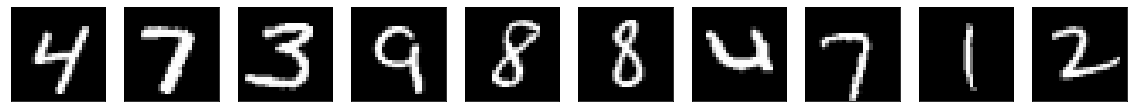

[tensor(4), tensor(7), tensor(3), tensor(9), tensor(8), tensor(8), tensor(4), tensor(7), tensor(1), tensor(2)]


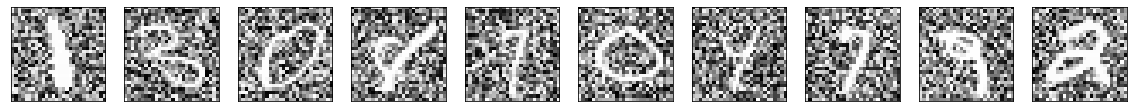

[tensor(1), tensor(3), tensor(0), tensor(8), tensor(7), tensor(0), tensor(4), tensor(7), tensor(9), tensor(2)]


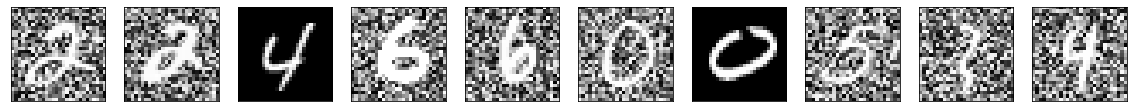

[tensor(2), tensor(2), tensor(4), tensor(6), tensor(6), tensor(0), tensor(0), tensor(5), tensor(3), tensor(4)]


In [110]:
# visualize
plt.rcParams["figure.figsize"] = (20,3)
i =91#152
plottedimgs = [torch.movedim(orig_images_tensorized[i], 0 ,-1) for i in range(10*i,10*(i+1))]
plot(plottedimgs, num_rows=1)
print([l.argmax() for l in orig_labels_tensorized[10*i:10*(i+1)]])

plottedimgs = [torch.movedim(add_images_tensorized[i], 0 ,-1) for i in range(10*i,10*(i+1))]
plot(plottedimgs, num_rows=1)
print([l.argmax() for l in add_labels_tensorized[10*i:10*(i+1)]])

plottedimgs = [torch.movedim(concat_images[i], 0 ,-1) for i in range(10*i,10*(i+1))]
plot(plottedimgs, num_rows=1)
print([l.argmax() for l in concat_labels[10*i:10*(i+1)]])

In [74]:
# save additional tensors 
filename = os.path.join(path_data, f'{dataset_type}_bgrandom.pt')
torch.save((add_images_tensorized, add_labels_tensorized), filename)
print(f'{filename} saved to disk')

../data/MNIST_bgimage/train_bgimage.pt saved to disk


In [107]:
## add to original + additional concat dataset
filename = os.path.join(path_data, f'{dataset_type}_original_and_bgrandom.pt')
torch.save((concat_images, concat_labels), filename)
print(f'{filename} saved to disk')

../data/MNIST_bgrandom/test_original_and_bgimage.pt saved to disk


# With blot background

## visualization

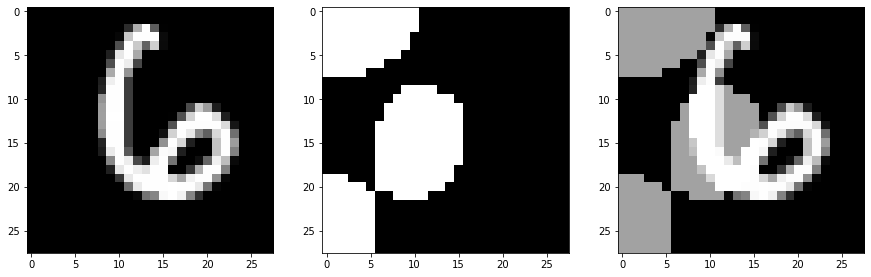

In [205]:
# partly erased stimuli demonstration
from scipy import ndimage
import random
# np.random.seed(1)
fig = plt.figure(figsize=(15, 80))
im_set = datasets.MNIST('../data/',train=False, download=False)

# image
i = 88
im = np.array(im_set[i][0])
fig.add_subplot(1, 3, 1)
plt.imshow(im, cmap='gray')


## blots
nblots = 5
sigma = 3
blots = np.zeros(im.shape)
points = im.shape[0]*np.random.random((2, nblots))
blots[(points[0]).astype(np.int64), (points[1]).astype(np.int64)] = 1
blots = ndimage.gaussian_filter(blots, sigma=sigma)
blotmask = (blots > blots.mean()).astype(np.int64)
blotbg = np.random.randint(0,255)*blotmask

# blotted
bim = im.copy().astype(np.int64)
imwbg =np.clip(bim+blotbg, a_max=255, a_min=0)
imwbg = imwbg.astype(np.uint8)

blotbg = blotbg.astype(np.uint8)
fig.add_subplot(1, 3, 2)
plt.imshow(blotbg, cmap='gray')


fig.add_subplot(1, 3, 3)
plt.imshow(imwbg, cmap='gray')
plt.show()

## generate data

In [211]:
def get_blot_dataset(im_set, nblots=5):
    intact_images = []
    blotted_images = []
    labels = []
    for img, label in im_set:
        img = np.array(img)
        intact_images.append(img)    
        blotted = blot_image(img.copy(), nblots)
        blotted_images.append(blotted)
        labels.append(label)
        
    # convert to tensor and one-hot vector
    transform_tohot = T.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
    intact_images_tensorized = torch.stack([T.ToTensor()(im) for im in intact_images])
    blotted_images_tensorized = torch.stack([T.ToTensor()(im) for im in blotted_images])
    labels_tensorized = torch.stack([transform_tohot(label) for label in labels])
    
    return intact_images_tensorized, blotted_images_tensorized, labels_tensorized

def get_tensorized_dataset(im_set):
    images = []
    labels = []
    for img, label in im_set:
        img = np.array(img)
        images.append(img)    
        labels.append(label)
        
    # convert to tensor and one-hot vector
    transform_tohot = T.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
    images_tensorized = torch.stack([T.ToTensor()(im) for im in images])
    labels_tensorized = torch.stack([transform_tohot(label) for label in labels])
    
    return images_tensorized, labels_tensorized

def blot_image(img, nblots=5, sigma=3, maskvalue=0):
    from scipy import ndimage
    # create blots
    img =img.astype(np.int64)
    blots = np.zeros(img.shape)
    points = img.shape[0]*np.random.random((2, nblots))
    blots[(points[0]).astype(np.int64), (points[1]).astype(np.int64)] = 1
    blots = ndimage.gaussian_filter(blots, sigma=sigma)
    blotmask = (blots > blots.mean()).astype(np.int64)
    blotbg = np.random.randint(0,255)*blotmask

    # put blot to original image 
    new_img =np.clip(img+blotbg, a_max=255, a_min=0)
    return new_img.astype(np.uint8)

def plot(imgs, num_rows = 1, with_orig=False, row_title=None, **imshow_kwargs):
#     if not isinstance(imgs, list):
#         raise ValueError('input images should be list form')

    num_cols = int(len(imgs)/num_rows) + (len(imgs)%num_rows > 0)
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
#     import pdb; pdb.set_trace()
    for row_idx in range(num_rows):
        for col_idx, img in enumerate(imgs[row_idx*num_cols:(row_idx+1)*num_cols]):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), cmap='gray', vmin=0, vmax=1,  **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

#     if with_orig:
#         axs[0, 0].set(title='Original image')
#         axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])
    plt.show()
#     plt.tight_layout()

In [222]:
# load original mnist
path_save = '../data/MNIST_recon'
dataset_type = 'test'
if dataset_type == 'train':
    im_set = datasets.MNIST('../data/',train=True, download=False)
elif dataset_type == 'test':
    im_set = datasets.MNIST('../data/',train=False, download=False)

orig_images_tensorized, orig_labels_tensorized = get_tensorized_dataset(im_set)
print(orig_images_tensorized.size())
print(orig_labels_tensorized.size())

torch.Size([10000, 1, 28, 28])
torch.Size([10000, 10])


In [223]:
# convert original mnist to random blot
random.seed(10)
increase_datasize_by=1

intact_images, blotted_images, labels = [], [], []
for i in range(increase_datasize_by):
    intact, blotted, lab = get_blot_dataset(im_set, nblots=5)
    intact_images.append(intact)
    blotted_images.append(blotted)
    labels.append(lab)
    
intact_images_tensorized = torch.cat(intact_images)
blotted_images_tensorized = torch.cat(blotted_images)
labels_tensorized = torch.cat(labels)

print(intact_images_tensorized.size())
print(blotted_images_tensorized.size())
print(labels_tensorized.size())

torch.Size([10000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])
torch.Size([10000, 10])


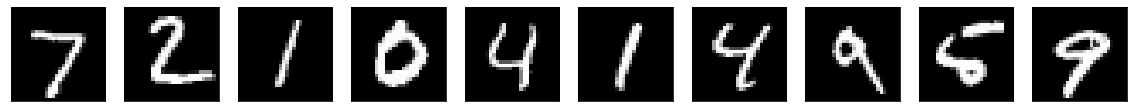

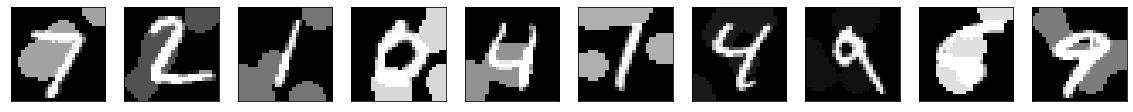

[tensor(7), tensor(2), tensor(1), tensor(0), tensor(4), tensor(1), tensor(4), tensor(9), tensor(5), tensor(9)]


In [224]:
# visualize erased images
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
plottedimgs = [torch.movedim(intact_images_tensorized[i], 0 ,-1) for i in range(10)]
plot(plottedimgs, num_rows=1)
plottedimgs = [torch.movedim(blotted_images_tensorized[i], 0 ,-1) for i in range(10)]
plot(plottedimgs, num_rows=1)
print([l.argmax() for l in labels_tensorized[:10]])

In [225]:
# save tensors recon-all
comment = 'blot5bg'
filename = os.path.join(path_save, f'{dataset_type}_recon_only_x{increase_datasize_by}_{comment}.pt')
torch.save((blotted_images_tensorized, intact_images_tensorized, labels_tensorized), filename)
print(f'{filename} saved to disk')

../data/MNIST_recon/test_recon_only_x1_blot5bg.pt saved to disk


In [226]:
#concate intact + blotted
combine_intact_blotted_images = torch.cat([orig_images_tensorized, blotted_images_tensorized]) # torch.Size([120000, 28, 28])
combine_intact_images = torch.cat([orig_images_tensorized, intact_images_tensorized])
combine_labels_tensorized = torch.cat([orig_labels_tensorized, labels_tensorized]) #

# shuffle the order
torch.manual_seed(10)
shuffled_indices = torch.randperm(combine_intact_blotted_images.shape[0])
combine_intact_blotted_images = combine_intact_blotted_images[shuffled_indices]
combine_intact_images = combine_intact_images[shuffled_indices]
combine_labels_tensorized = combine_labels_tensorized[shuffled_indices]

print(combine_intact_blotted_images .size())
print(combine_intact_images.size())
print(combine_labels_tensorized.size())

torch.Size([20000, 1, 28, 28])
torch.Size([20000, 1, 28, 28])
torch.Size([20000, 10])


In [ ]:
# visualize images
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
plottedimgs = [torch.movedim(combine_intact_blotted_images[i], 0 ,-1) for i in range(10,20)]
plot(plottedimgs, num_rows=1)
plottedimgs = [torch.movedim(combine_intact_images[i], 0 ,-1) for i in range(10,20)]
plot(plottedimgs, num_rows=1)
print([l.argmax() for l in combine_labels_tensorized[:10]])

In [228]:
# tensor save recon-half
comment = 'blot5bg'
filename = os.path.join(path_save, f'{dataset_type}_recon_combine_x{increase_datasize_by}_{comment}.pt')
torch.save((combine_intact_blotted_images, combine_intact_images, combine_labels_tensorized), filename)
print(f'{filename} saved to disk')

../data/MNIST_recon/test_recon_combine_x1_blot5bg.pt saved to disk
